In [1]:
import numpy
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.utils.data.dataloader as dataloader
import torch.optim as optim

from torch.utils.data import TensorDataset
from torchvision import transforms
from torchvision.datasets import MNIST
import matplotlib.pyplot as plt

SEED = 1

# CUDA?
cuda = torch.cuda.is_available()

# For reproducibility
torch.manual_seed(SEED)
device = torch.device("cuda" if cuda else "cpu")

if cuda:
    torch.cuda.manual_seed(SEED)

### AlexNet transformation

In [3]:
from torchvision import transforms

AlexTransform = transforms.Compose([
    transforms.Resize((227, 227)),
    transforms.ToTensor(),
    transforms.Normalize((0.1307,), (0.3081,))
])

### Import dataset

In [8]:
import os
import torchvision

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

batch_size=256
dataset_dir = os.path.join(os.path.expanduser("~"), 'Datasets', 'FashionMNIST')

# Load the dataset for the training/validation sets
train_dataset_alex = torchvision.datasets.FashionMNIST(root=dataset_dir,
                                           train=True,
                                           transform= AlexTransform,
                                           download=True)

test_dataset_alex = torchvision.datasets.FashionMNIST(root=dataset_dir,
                                           train=False,
                                           transform= AlexTransform,
                                           download=True)

train_loader_alex = torch.utils.data.DataLoader(dataset=train_dataset_alex,
                                          batch_size=batch_size,
                                          shuffle=True,                
                                          num_workers=4)

test_loader_alex = torch.utils.data.DataLoader(dataset=test_dataset_alex,
                                          batch_size=batch_size,
                                          shuffle=True,                
                                          num_workers=4)

In [11]:
print("The train set contains {} images, in {} batchs".format(len(train_loader_alex.dataset), len(train_loader_alex)))
print("The test set contains {} images, in {} batchs".format(len(test_loader_alex.dataset), len(test_loader_alex)))

The train set contains 60000 images, in 235 batchs
The test set contains 10000 images, in 40 batchs


32768it [02:24, 226.69it/s]
4423680it [02:24, 30626.14it/s] 
8192it [02:24, 56.87it/s]


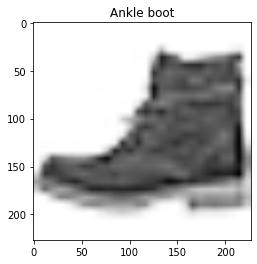

26427392it [02:27, 178827.79it/s]  


In [13]:
from functions.plot_picture import matplotlib_imshow

# get some random training images
dataiter = iter(train_loader_alex)

images, labels = dataiter.next()

# # creat grid of images
img_grid = torchvision.utils.make_grid(images[0])

# # show images & labels
matplotlib_imshow(img_grid, class_names[labels[0]])

### Train model with AlexNet architecture

In [ ]:
from functions.training import train_model, evaluate_model
from models.alexnet_arch import AlexNet
import torch.optim as optim

losses = []
accuracies = []
EPOCHS = 10
nb_batch = int(np.ceil(len(train_loader_alex.dataset)/batch_size))

optimizer = optim.Adam(AlexNet().parameters(),  lr=0.001)

for epoch in range(EPOCHS):
  losses.extend(train_model(train_loader_alex, device, AlexNet(), optimizer, epoch, losses, EPOCHS)[-nb_batch:])
  accuracies.extend(evaluate_model(model_lenet, device, test_loader, losses[-1], EPOCHS, batch_size, len(train_loader_alex.dataset)))

 Train Epoch: 1/[] [256/60000 (10%)]	Loss: 2.302109